### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
import pandas as pd

# URLs dos conjuntos de dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carrega cada CSV em um DataFrame
df_loja1 = pd.read_csv(url)
df_loja2 = pd.read_csv(url2)
df_loja3 = pd.read_csv(url3)
df_loja4 = pd.read_csv(url4)

# Converte todos os nomes das colunas para minúsculas em cada DataFrame
df_loja1.columns = df_loja1.columns.str.lower()
df_loja2.columns = df_loja2.columns.str.lower()
df_loja3.columns = df_loja3.columns.str.lower()
df_loja4.columns = df_loja4.columns.str.lower()


# Adiciona uma coluna 'loja' a cada DataFrame para identificar a origem dos dados
df_loja1['loja'] = 'Loja 1'
df_loja2['loja'] = 'Loja 2'
df_loja3['loja'] = 'Loja 3'
df_loja4['loja'] = 'Loja 4'

# Combina todos os DataFrames em um só
df_full = pd.concat([df_loja1, df_loja2, df_loja3, df_loja4], ignore_index=True)


# Renomeia a coluna 'preço' para 'preco' para evitar problemas com caracteres especiais
df_full = df_full.rename(columns={'preço': 'preco'})


print("--- Verificação de Colunas ---")
print("Colunas presentes no DataFrame combinado (df_full):")
print(df_full.columns.tolist()) # Isso mostrará a lista exata de colunas

--- Verificação de Colunas ---
Colunas presentes no DataFrame combinado (df_full):
['produto', 'categoria do produto', 'preco', 'frete', 'data da compra', 'vendedor', 'local da compra', 'avaliação da compra', 'tipo de pagamento', 'quantidade de parcelas', 'lat', 'lon', 'loja']


#1. Análise do faturamento


In [3]:
#Faturamento total por loja
faturamento_total = df_full['preco'].sum()
print(f"Faturamento Total: R${faturamento_total:.2f}")

Faturamento Total: R$5871490.79


In [4]:
def faturamento_por_loja(df):
    faturamento_por_loja = df.groupby('loja')['preco'].sum()
    return faturamento_por_loja

faturamento_por_loja = faturamento_por_loja(df_full)
print(faturamento_por_loja)

loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: preco, dtype: float64


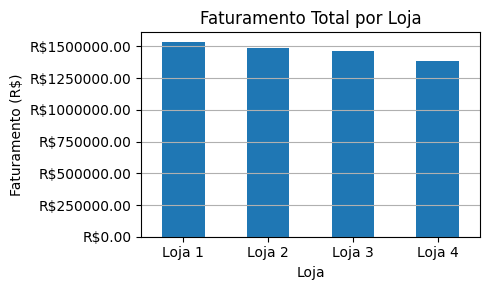

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# O faturamento por loja já foi calculado e está na variável 'faturamento_por_loja'

# Criar o gráfico de barras
plt.figure(figsize=(5, 3)) # Ajuste o tamanho da figura se necessário
faturamento_por_loja.plot(kind='bar')

plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0) # Rotacionar os rótulos do eixo X se necessário

# Formatar o eixo Y como moeda
formatter = mticker.FormatStrFormatter('R$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y') # Adicionar grade apenas no eixo Y para facilitar a leitura
plt.tight_layout() # Ajustar layout para evitar cortes
plt.show()

# 2. Vendas por Categoria


In [6]:
vendas_por_categoria = df_full.groupby('categoria do produto')['preco'].sum()
print(vendas_por_categoria)

categoria do produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: preco, dtype: float64


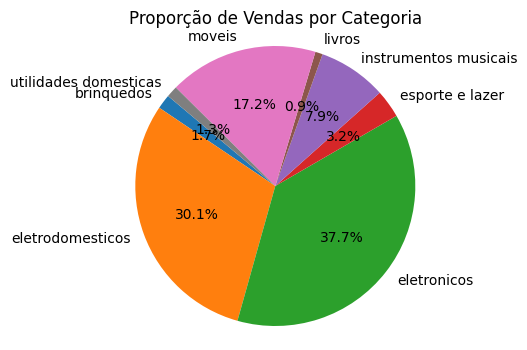

In [7]:
import matplotlib.pyplot as plt

# As vendas por categoria já foram calculadas na variável 'vendas_por_categoria'

plt.figure(figsize=(5, 4)) # Ajuste o tamanho da figura se necessário
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=140)

plt.title('Proporção de Vendas por Categoria')
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo.
plt.show()


# 3. Média de Avaliação das Lojas

In [8]:
def media_avaliacao(df):
    media = df['avaliação da compra'].mean()
    return media

media_total = media_avaliacao(df_full)
print(f"Média de Avaliação Geral: {media_total:.2f}")

Média de Avaliação Geral: 4.01


In [9]:
# Calcular a média de avaliação por loja
media_avaliacao_por_loja = df_full.groupby('loja')['avaliação da compra'].mean()

# Encontrar a loja com a melhor avaliação
melhor_loja = media_avaliacao_por_loja.idxmax()
melhor_avaliacao = media_avaliacao_por_loja.max()

# Encontrar a loja com a pior avaliação
pior_loja = media_avaliacao_por_loja.idxmin()
pior_avaliacao = media_avaliacao_por_loja.min()

print(f"Loja com a melhor avaliação: {melhor_loja} (Média: {melhor_avaliacao:.2f})")
print(f"Loja com a pior avaliação: {pior_loja} (Média: {pior_avaliacao:.2f})")

Loja com a melhor avaliação: Loja 3 (Média: 4.05)
Loja com a pior avaliação: Loja 1 (Média: 3.98)


# 4. Produtos Mais e Menos Vendidos

In [10]:
produtos_mais_vendidos = df_full['produto'].value_counts().head(5)
produtos_menos_vendidos = df_full['produto'].value_counts().tail(5)

print("Produtos Mais Vendidos: ")
print(produtos_mais_vendidos)

print("\nProdutos Menos Vendidos: ")
print(produtos_menos_vendidos)

Produtos Mais Vendidos: 
produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

Produtos Menos Vendidos: 
produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [27]:
# Combinar dados de produtos mais vendidos por loja com a média de avaliação por produto
produtos_combinados = produtos_mais_vendidos_por_loja.reset_index().rename(columns={'count': 'quantidade_vendida'})
produtos_combinados = produtos_combinados.merge(media_avaliacao_por_produto, on='produto', how='left')
produtos_combinados = produtos_combinados.rename(columns={'avaliação da compra': 'media_avaliacao'})

print("Produtos Mais Vendidos por Loja com Média de Avaliação:")
display(produtos_combinados)

# Combinar dados de categorias mais vendidas por loja com a média de avaliação por categoria
categorias_combinadas = categorias_mais_vendidas_por_loja.reset_index().rename(columns={'count': 'quantidade_vendida'})
categorias_combinadas = categorias_combinadas.merge(media_avaliacao_por_categoria, on='categoria do produto', how='left')
categorias_combinadas = categorias_combinadas.rename(columns={'avaliação da compra': 'media_avaliacao'})


print("\nCategorias Mais Vendidas por Loja com Média de Avaliação:")
display(categorias_combinadas)

Produtos Mais Vendidos por Loja com Média de Avaliação:


,loja,produto,quantidade_vendida,media_avaliacao
0,Loja 1,Guarda roupas,60,4.030457
1,Loja 1,Micro-ondas,60,3.956311
2,Loja 1,TV Led UHD 4K,60,3.994652
3,Loja 1,Secadora de roupas,58,4.015000
4,Loja 1,Blocos de montar,56,4.110553
5,Loja 1,Cômoda,56,4.052381
6,Loja 1,Bola de basquete,55,3.954315
7,Loja 1,Bicicleta,54,4.020408
8,Loja 1,Copo térmico,54,4.000000
9,Loja 1,Geladeira,54,4.162304



Categorias Mais Vendidas por Loja com Média de Avaliação:


,loja,categoria do produto,quantidade_vendida,media_avaliacao
0,Loja 1,moveis,465,4.033934
1,Loja 1,eletronicos,448,3.992664
2,Loja 1,brinquedos,324,4.070543
3,Loja 1,eletrodomesticos,312,4.014795
4,Loja 1,esporte e lazer,284,3.988320
5,Loja 1,instrumentos musicais,182,4.003984
6,Loja 1,livros,173,4.004043
7,Loja 1,utilidades domesticas,171,3.979452
8,Loja 2,moveis,442,4.033934
9,Loja 2,eletronicos,422,3.992664


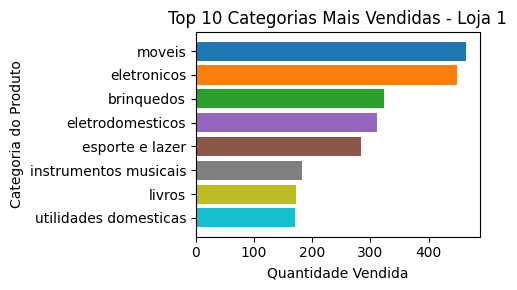

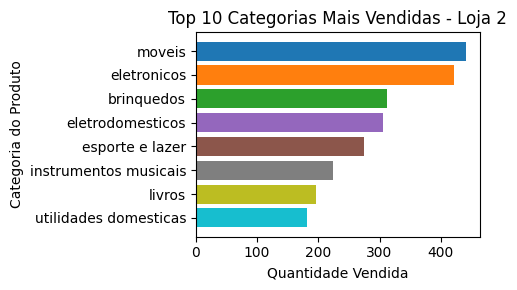

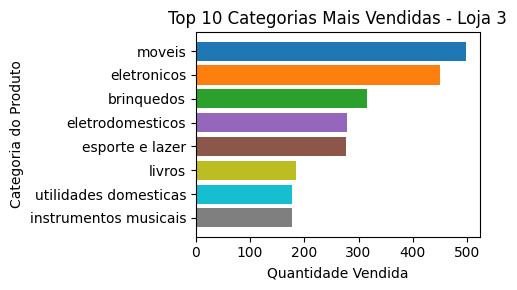

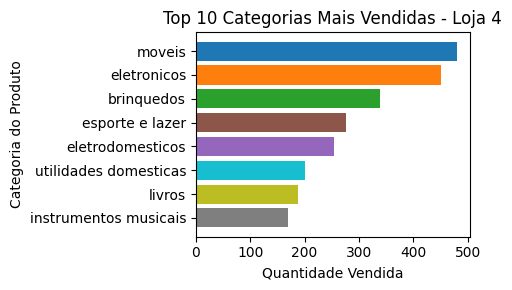

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Categorias mais vendidas por loja (já calculadas na variável 'categorias_mais_vendidas_por_loja')

lojas = categorias_mais_vendidas_por_loja.index.get_level_values('loja').unique()
categorias_unicas = categorias_mais_vendidas_por_loja.index.get_level_values('categoria do produto').unique()
cores = plt.colormaps['tab10'](np.linspace(0, 1, len(categorias_unicas))) # Define a colormap e gera cores suficientes

for loja in lojas:
    plt.figure(figsize=(5, 3))
    dados_loja = categorias_mais_vendidas_por_loja[loja]
    dados_loja = dados_loja.sort_values()
    # Mapeia as categorias para as cores
    cores_barras = [cores[categorias_unicas.get_loc(categoria)] for categoria in dados_loja.index]
    plt.barh(dados_loja.index, dados_loja.values, color=cores_barras) # Aplica cores diferentes a cada barra
    plt.title(f'Top 10 Categorias Mais Vendidas - {loja}')
    plt.xlabel('Quantidade Vendida')
    plt.ylabel('Categoria do Produto')
    plt.tight_layout()
    plt.show()

# 5. Frete Médio por Loja


In [12]:
def frete_medio(df):
  frete_medio = df['frete'].mean()
  return frete_medio

frete_medio_total = frete_medio(df_full)
frete_medio_loja1 = frete_medio(df_loja1)
frete_medio_loja2 = frete_medio(df_loja2)
frete_medio_loja3 = frete_medio(df_loja3)
frete_medio_loja4 = frete_medio(df_loja4)

print(f"\nFrete Médio Total: R${frete_medio_total:.2f}")
print(f"\nFrete Médio Loja 1: R${frete_medio_loja1:.2f}")
print(f"\nFrete Médio Loja 2: R${frete_medio_loja2:.2f}")
print(f"\nFrete Médio Loja 3: R${frete_medio_loja3:.2f}")
print(f"\nFrete Médio Loja 4: R${frete_medio_loja4:.2f}")


Frete Médio Total: R$33.17

Frete Médio Loja 1: R$34.69

Frete Médio Loja 2: R$33.62

Frete Médio Loja 3: R$33.07

Frete Médio Loja 4: R$31.28


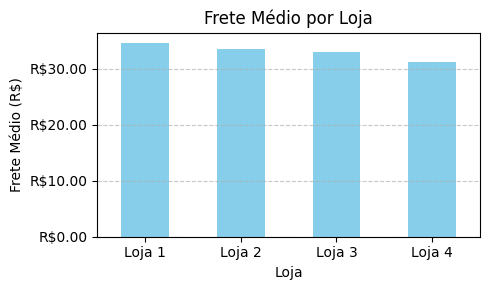

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Calcular o frete médio por loja
frete_medio_por_loja = df_full.groupby('loja')['frete'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(5, 3))
frete_medio_por_loja.plot(kind='bar', color='skyblue')

plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=0)

# Formatar o eixo Y como moeda
formatter = mticker.FormatStrFormatter('R$%1.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Relatório de Desempenho das Lojas

Com base nas análises de faturamento e avaliação das lojas, podemos resumir o desempenho de cada uma:

 Faturamento Total por Loja

 Loja   -------- Faturamento             

 Loja 1 -------- R$1.53 mi

 Loja 2 -------- R$1.48 mi

 Loja 3 -------- R$1.46 mi

 Loja 4 -------- R$1.38 mi        


*Análise:* A Loja 1 apresentou o maior faturamento total, enquanto a Loja 4 teve o menor faturamento.

### Média de Avaliação por Loja

| Loja   | Média de Avaliação | Posição na Avaliação |
|--------|--------------------|----------------------|
| Loja 1 | 3.98               | 4ª                  |
| Loja 2 | 4.04               | 2ª                  |
| Loja 3 | 4.05               | 1ª                  |
| Loja 4 | 4.00               | 3ª                  |

*Análise:* A Loja 3 obteve a melhor média de avaliação dos clientes, enquanto a Loja 1 teve a menor média.

### Conclusão

Ao analisar em conjunto o faturamento e a média de avaliação:

*   A **Loja 1**, apesar de ter o maior faturamento, apresenta a menor média de avaliação. Isso pode indicar que, embora venda bastante, a satisfação do cliente pode ser uma área a ser melhorada.
*   A **Loja 3** tem o maior faturamento e a melhor avaliação, indicando um bom desempenho tanto em vendas quanto na satisfação do cliente.
*   A **Loja 4** tem o menor faturamento e a terceira melhor avaliação. Seu desempenho em vendas é o mais baixo entre as quatro lojas.

Para avaliar uma possível desativação, a **Loja 4** seria a candidata mais evidente com base apenas nesses dois critérios, por apresentar o menor faturamento. No entanto, é importante considerar outros fatores, como custos operacionais específicos de cada loja, potencial de crescimento regional, e outros dados que não foram analisados aqui. A **Loja 1** também merece atenção devido à baixa avaliação, apesar do alto faturamento.

